# Overview

1. Data Structure Reading and Exploring
2. Exploratory Data Analysis
3. Feature Engineering
4. Clustering by Kmeans 
5. Cluster Analysis 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipldata/deliveries.csv
/kaggle/input/ipldata/matches.csv


In [2]:
# Read the data
match_path='/kaggle/input/ipldata/matches.csv'
deliv_path='/kaggle/input/ipldata/deliveries.csv'
match_df=pd.read_csv(match_path)
deliv_df=pd.read_csv(deliv_path)

In [3]:
# Preview the data
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliv_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# Explore different attributes 
print(deliv_df.columns)
print(match_df.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [6]:
# Check which data types and null values for each column
print(deliv_df.info())
print(match_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
# Explore summary statistics for each column
deliv_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
match_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Exploratory Data Analysis 
Using the two tables in this dataset, we will now perform some exploratory data analysis. 

Namely I am particularly interested in looking at the following things:

* Which individuals have won the most player of the matches in the history of the IPL? How has this changed over the seasons?
* The Top 10 Bowlers in IPL History in terms of Wickets Taken
* The Top 10 Fielders in IPL History in terms of Dismissals involved in
* The Most Common Wicket Combinations (i.e. Which Bowlers have a edge on specific Batsmen)
* The Top 10 Batsmen in IPL History in terms of Runs Scored, Average and Strike Rate
* Exploring Different Batting & Bowling Combinations in terms of Bowler's SR, Average, Runs Conceded and Economy 

In [9]:
# Overall Player of the Matches 
potm=match_df.player_of_match.value_counts()
potm_df=pd.DataFrame(potm)
potm_df=potm_df[:10]
potm_df

,player_of_match
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
DA Warner,17
RG Sharma,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13
AM Rahane,12


Text(0.5, 1.0, 'The Top Players in IPL History')

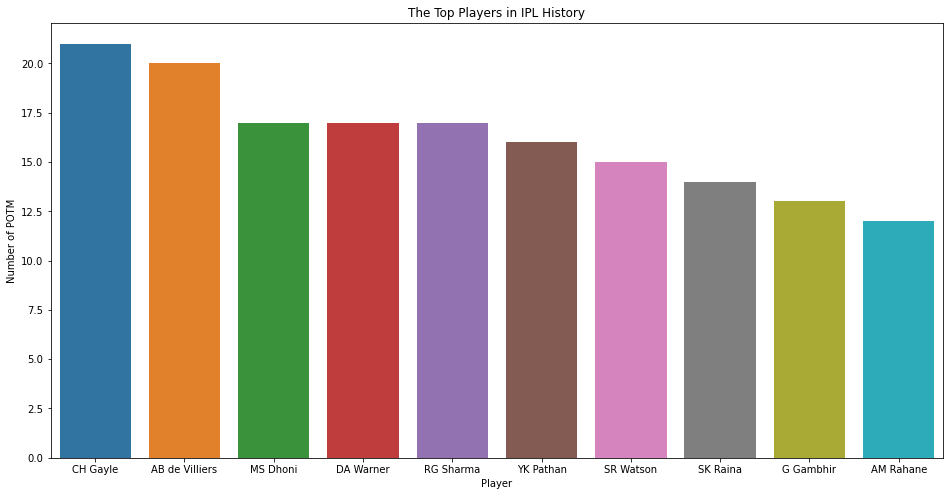

In [10]:
#Plot the results
f,ax=plt.subplots(figsize=(16,8))
sns.barplot(potm_df.index,potm_df.player_of_match)
plt.xlabel('Player')
plt.ylabel('Number of POTM')
plt.title('The Top Players in IPL History')


In [11]:
# POTM over time
potm_time=match_df[['season','player_of_match']]
potm_time['count']=1
potm_time=potm_time.groupby(['season','player_of_match']).sum().reset_index()
potm_time.set_index('player_of_match',inplace=True)
potm_time=potm_time.loc[potm_df.index]
potm_time


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,season,count
player_of_match,,
CH Gayle,2009,1
CH Gayle,2011,6
CH Gayle,2012,5
CH Gayle,2013,3
CH Gayle,2015,2
...,...,...
AM Rahane,2012,2
AM Rahane,2013,3
AM Rahane,2014,2


In [12]:
# Compute the Cumulative Sum of POTMs through the seasons 
potm_time['CumSum']=None
for i in potm_time.index.unique():
    series=pd.Series(potm_time['count'].loc[i])
    cumsum=series.cumsum()
    l=cumsum.values.tolist()
    potm_time['CumSum'].loc[i]=l
potm_time

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,season,count,CumSum
player_of_match,,,
CH Gayle,2009,1,1
CH Gayle,2011,6,7
CH Gayle,2012,5,12
CH Gayle,2013,3,15
CH Gayle,2015,2,17
...,...,...,...
AM Rahane,2012,2,2
AM Rahane,2013,3,5
AM Rahane,2014,2,7


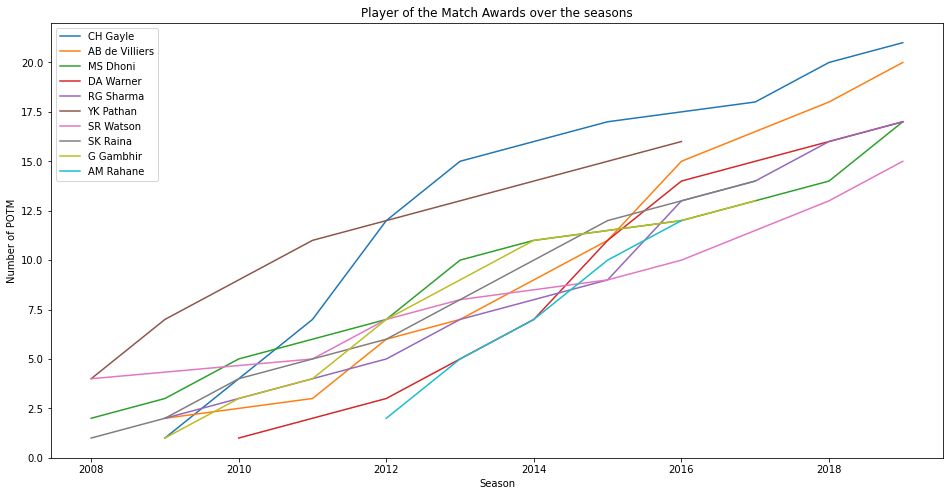

In [13]:
# Plot our findings 
f,ax=plt.subplots(figsize=(16,8))
for i in potm_time.index.unique():
    plt.plot(potm_time['season'].loc[i],potm_time['CumSum'].loc[i],label=i)

plt.ylabel('Number of POTM')
plt.xlabel('Season')
plt.title('Player of the Match Awards over the seasons')
plt.legend()

    

In [14]:
# Explore the different dismissal kinds in our table
print(deliv_df.dismissal_kind.unique())
dismissal_df=deliv_df[['bowler','player_dismissed','dismissal_kind','fielder']].dropna(subset=['dismissal_kind'])
dismissal_df.head()

[nan 'caught' 'bowled' 'run out' 'lbw' 'caught and bowled' 'stumped'
 'retired hurt' 'hit wicket' 'obstructing the field']


,bowler,player_dismissed,dismissal_kind,fielder
11,A Choudhary,DA Warner,caught,Mandeep Singh
64,STR Binny,S Dhawan,caught,Sachin Baby
94,YS Chahal,MC Henriques,caught,Sachin Baby
116,TS Mills,Yuvraj Singh,bowled,NaN
160,Rashid Khan,Mandeep Singh,bowled,NaN


Text(0.5, 1.0, 'Top 10 Bowlers in IPL History')

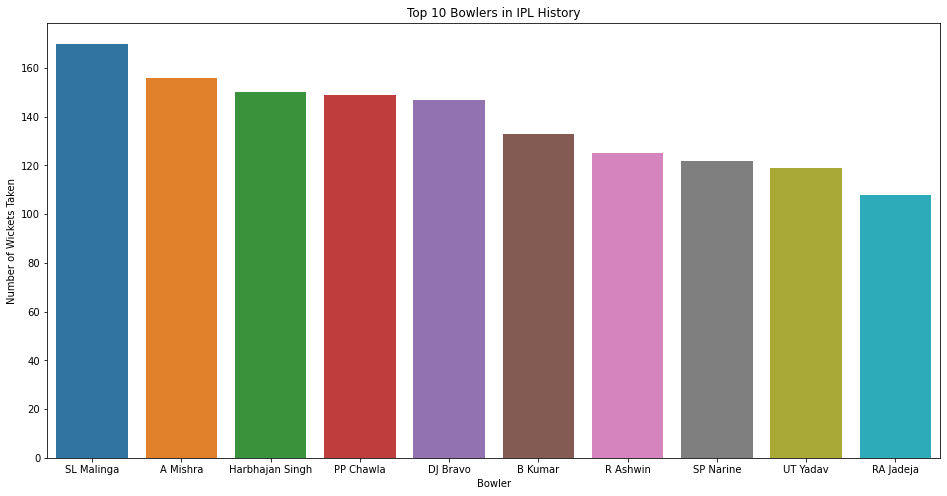

In [15]:
# There are many things we investigate
# First let's consider which bowler has taken the most wickets
wickets=dismissal_df[(dismissal_df['dismissal_kind']!='retired hurt')
                     &(dismissal_df['dismissal_kind']!='obstructing the field')
                     &(dismissal_df['dismissal_kind']!='run out')].groupby(['bowler'])['dismissal_kind'].count().sort_values(ascending=False).reset_index()
f,ax=plt.subplots(figsize=(16,8))
sns.barplot(wickets['bowler'][:10],wickets['dismissal_kind'][:10])
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets Taken')
plt.title('Top 10 Bowlers in IPL History')

Text(0.5, 1.0, 'Top 10 Fielders in IPL History')

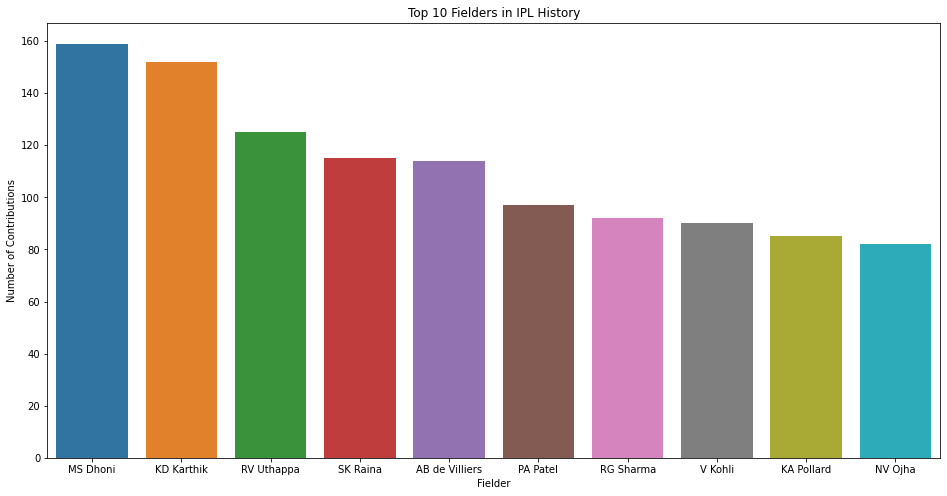

In [16]:
# Next let's consider the best fielders 
Fielder=dismissal_df.groupby(['fielder'])['dismissal_kind'].count().sort_values(ascending=False).reset_index()
f,ax=plt.subplots(figsize=(16,8))
sns.barplot(Fielder['fielder'][:10],Fielder['dismissal_kind'][:10])
plt.xlabel('Fielder')
plt.ylabel('Number of Contributions')
plt.title('Top 10 Fielders in IPL History')

In [17]:
# Finally let's consider which bowlers have a specific edge over a batsmen 

combinations= dismissal_df[(dismissal_df['dismissal_kind']!='retired hurt')
                     &(dismissal_df['dismissal_kind']!='obstructing the field')
                     &(dismissal_df['dismissal_kind']!='run out')].groupby(['bowler','player_dismissed'])['dismissal_kind'].count().sort_values(ascending=False).reset_index()
combinations.head(10)

,bowler,player_dismissed,dismissal_kind
0,Z Khan,MS Dhoni,7
1,SP Narine,RG Sharma,6
2,R Vinay Kumar,RG Sharma,6
3,B Kumar,PA Patel,6
4,A Mishra,RG Sharma,6
5,Z Khan,G Gambhir,6
6,B Kumar,AM Rahane,6
7,MM Sharma,AT Rayudu,6
8,A Nehra,V Kohli,6
9,PP Ojha,MS Dhoni,6


In [18]:
#let's dive further and investigate how Dhoni is getting dismissed by Khan
print(dismissal_df[(dismissal_df['bowler']=='Z Khan')&(dismissal_df['player_dismissed']=='MS Dhoni')])
#let's also look at Rohit Sharma and Sunil Narine in the IPL since this will be key battle in this year's tournament
dismissal_df[(dismissal_df['bowler']=='SP Narine')&(dismissal_df['player_dismissed']=='RG Sharma')]

        bowler player_dismissed dismissal_kind              fielder
17272   Z Khan         MS Dhoni         caught  R Vinay Kumar (sub)
55311   Z Khan         MS Dhoni         caught         CRD Fernando
58650   Z Khan         MS Dhoni         caught       AB de Villiers
71712   Z Khan         MS Dhoni         caught             A Mithun
75486   Z Khan         MS Dhoni         caught     TM Dilshan (sub)
107195  Z Khan         MS Dhoni         caught           JD Unadkat
133951  Z Khan         MS Dhoni         caught             S Nadeem


,bowler,player_dismissed,dismissal_kind,fielder
1616,SP Narine,RG Sharma,lbw,NaN
87562,SP Narine,RG Sharma,caught,BB McCullum
97942,SP Narine,RG Sharma,caught and bowled,NaN
117805,SP Narine,RG Sharma,bowled,NaN
134261,SP Narine,RG Sharma,bowled,NaN
159066,SP Narine,RG Sharma,caught,NaN


In [19]:
# We have considered the POTM,fielding and bowling side, now let's consider the batting side of the IPL
batting_df=deliv_df[['batsman','bowler','batsman_runs','ball','player_dismissed']]
batting_df

,batsman,bowler,batsman_runs,ball,player_dismissed
0,DA Warner,TS Mills,0,1,NaN
1,DA Warner,TS Mills,0,2,NaN
2,DA Warner,TS Mills,4,3,NaN
3,DA Warner,TS Mills,0,4,NaN
4,DA Warner,TS Mills,0,5,NaN
...,...,...,...,...,...
179073,RA Jadeja,SL Malinga,1,2,NaN
179074,SR Watson,SL Malinga,2,3,NaN
179075,SR Watson,SL Malinga,1,4,SR Watson
179076,SN Thakur,SL Malinga,2,5,NaN


Text(0.5, 1.0, 'Top 10 Batsmen in IPL History')

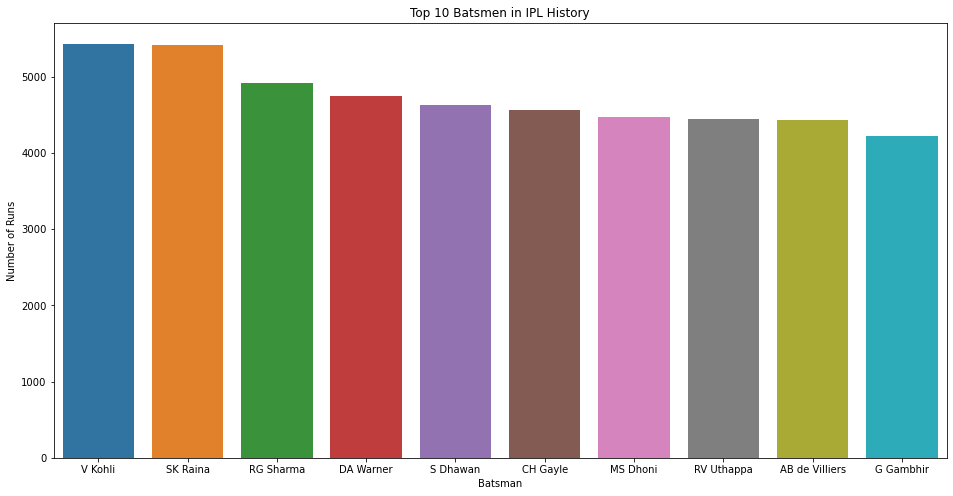

In [20]:
# Most Runs

runs=batting_df.groupby(['batsman'])
runs=runs.agg({'batsman_runs':'sum','ball':'count','player_dismissed':'count'})
runs=runs.sort_values(by='batsman_runs',ascending=False).reset_index()
f,ax=plt.subplots(figsize=(16,8))
sns.barplot(runs['batsman'][:10],runs['batsman_runs'][:10])
plt.xlabel('Batsman')
plt.ylabel('Number of Runs')
plt.title('Top 10 Batsmen in IPL History')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


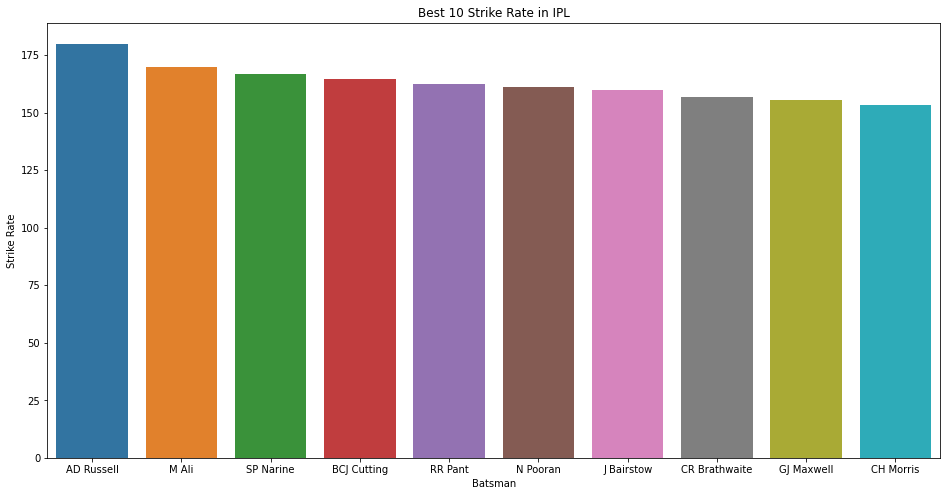

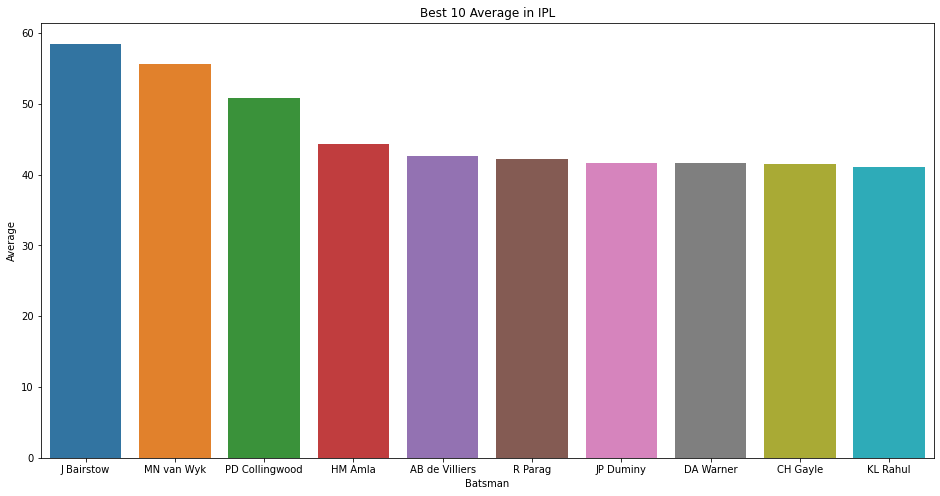

In [21]:
# Best Strike Rates and Averages 
# Consider Those who have played at least 100 balls because of the Law of Large Numbers 
sr=runs[runs['ball']>=100]
sr['Strike Rate']=(100*(sr['batsman_runs']/sr['ball']))
sr['Average']=(sr['batsman_runs']/sr['player_dismissed'])
for i in ['Strike Rate','Average']:
    sort=sr.sort_values(by=i,ascending=False).reset_index()
    f,ax=plt.subplots(figsize=(16,8))
    sns.barplot(sort['batsman'][:10],sort[i][:10])
    plt.xlabel('Batsman')
    plt.ylabel(i)
    plt.title('Best 10 {} in IPL'.format(i))

In [22]:
# Who has scored the most runs off a specific bowler
combin=batting_df.groupby(['batsman','bowler'])
combin=combin.agg({'batsman_runs':'sum','ball':'count','player_dismissed':'count'})
combin=combin.reset_index()
combin.sort_values(by='batsman_runs',ascending=False)

,batsman,bowler,batsman_runs,ball,player_dismissed
16254,SK Raina,PP Chawla,175,102,4
18442,V Kohli,A Mishra,159,103,2
18590,V Kohli,R Ashwin,153,119,0
15157,S Dhawan,Harbhajan Singh,148,123,4
14190,RG Sharma,PP Chawla,146,113,1
...,...,...,...,...,...
4588,DJ Jacobs,DP Nannes,0,2,1
2382,B Sumanth,A Mishra,0,2,0
4586,DJ Jacobs,Bipul Sharma,0,1,1
14892,Rashid Khan,O Thomas,0,1,0


In [23]:
# Who has the worst economy when bowling to a specific batsmen
combin['Economy']=(6*(combin['batsman_runs']/combin['ball']))
combin=combin[combin['ball']>20]
combin.sort_values(by='Economy',ascending=False)

,batsman,bowler,batsman_runs,ball,player_dismissed,Economy
1058,AD Russell,Mohammed Shami,77,27,1,17.111111
5905,GJ Maxwell,KV Sharma,75,28,0,16.071429
3969,DA Warner,KW Richardson,56,21,0,16.000000
8613,KL Rahul,Mohammad Nabi,55,21,0,15.714286
1029,AD Russell,DJ Bravo,78,30,0,15.600000
...,...,...,...,...,...,...
9180,LMP Simmons,B Kumar,13,28,1,2.785714
5705,GC Smith,P Kumar,16,35,2,2.742857
18173,TM Dilshan,B Kumar,11,25,0,2.640000
4569,DJ Hussey,UT Yadav,10,25,3,2.400000


In [24]:
# Let's Consider The Same For Bowling Strike Rate and Bowling Average
combin['strike rate']= combin['ball']/combin['player_dismissed']
combin['average']=combin['batsman_runs']/combin['player_dismissed']
combin.sort_values(by='strike rate').head(5)

,batsman,bowler,batsman_runs,ball,player_dismissed,Economy,strike rate,average
6647,Ishan Kishan,Imran Tahir,33,21,5,9.428571,4.200000,6.600000
8463,KK Nair,Harbhajan Singh,20,21,4,5.714286,5.250000,5.000000
14203,RG Sharma,R Vinay Kumar,22,34,6,3.882353,5.666667,3.666667
1733,AR Patel,JJ Bumrah,16,23,4,4.173913,5.750000,4.000000
1923,AT Rayudu,AB Dinda,28,24,4,7.000000,6.000000,7.000000


In [25]:
combin.sort_values(by='average').head(5)

,batsman,bowler,batsman_runs,ball,player_dismissed,Economy,strike rate,average
12198,NV Ojha,RP Singh,10,29,4,2.068966,7.250000,2.500000
4569,DJ Hussey,UT Yadav,10,25,3,2.400000,8.333333,3.333333
14203,RG Sharma,R Vinay Kumar,22,34,6,3.882353,5.666667,3.666667
1733,AR Patel,JJ Bumrah,16,23,4,4.173913,5.750000,4.000000
19545,YK Pathan,YS Chahal,13,22,3,3.545455,7.333333,4.333333


# Feature Engineering
In order for our cluster model to group the player data into useful categories that we perform further analysis on,we need to provide it additional more  features that are often indicative of a player's performance. These are the key metrics we will engineer/select:

**Batsmen Key Metrics**
1. Runs
2. Batting Strike Rate
3. Batting Average
4. Percentage of Runs from Boundaries 

**Bowler Key Metrics**
1. Wickets Taken
2. 1/Economy 
3. 1/Bowling Strike Rate
4. 1/Bowling Average
5. Extras
6. Percentage of Overs in the Powerplay, Death and Middle 

One important thing to note is that I have chosen to use the reciprocal of the Economy, Bowling Strike Rate and Bowling Average as our measure since the machine learning models tends to interpret higher numerical variables as better. In the game of cricket, a bowler aims to minimise these three metrics so this may lead to our model running into some diffculties. Additionally, if a player has never bowled or never taken a wicket, he will have an infinity value for this metric and therefore our model won't be able to run using this value. Furthermore, analysing our cluster will be significantly easier if we know that for all our performance metrics the higher the metric, the better a player's performance. With all these considerations in mind, I decided to take the reciprocal of the Bowling Economy, Strike Rate and Average. 

**Fielder/Wicket Keeper Metrics**
1. Total Dismissals
2. Catches as percentage of total dismissals  
3. Stumpings as percentage of total dismissals  
4. Run outs as percentage of total dismissals  

**Additional Features**
1. Whether or not a player has bowled in the history of the IPL

In [26]:
# Let's start by getting the batting stats
batting_df

,batsman,bowler,batsman_runs,ball,player_dismissed
0,DA Warner,TS Mills,0,1,NaN
1,DA Warner,TS Mills,0,2,NaN
2,DA Warner,TS Mills,4,3,NaN
3,DA Warner,TS Mills,0,4,NaN
4,DA Warner,TS Mills,0,5,NaN
...,...,...,...,...,...
179073,RA Jadeja,SL Malinga,1,2,NaN
179074,SR Watson,SL Malinga,2,3,NaN
179075,SR Watson,SL Malinga,1,4,SR Watson
179076,SN Thakur,SL Malinga,2,5,NaN


In [27]:
# Counting actual dismissals since a player could get out by a run out/retired hurt
dis=list(batting_df['batsman']==batting_df['player_dismissed'])
batting_df['dismissed']=dis
batting_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,batsman,bowler,batsman_runs,ball,player_dismissed,dismissed
0,DA Warner,TS Mills,0,1,NaN,False
1,DA Warner,TS Mills,0,2,NaN,False
2,DA Warner,TS Mills,4,3,NaN,False
3,DA Warner,TS Mills,0,4,NaN,False
4,DA Warner,TS Mills,0,5,NaN,False
...,...,...,...,...,...,...
179073,RA Jadeja,SL Malinga,1,2,NaN,False
179074,SR Watson,SL Malinga,2,3,NaN,False
179075,SR Watson,SL Malinga,1,4,SR Watson,True
179076,SN Thakur,SL Malinga,2,5,NaN,False


In [28]:
# Counting Boundaries Hit 
batting_df['is_boundary']=False
batting_df['is_boundary'].loc[(batting_df['batsman_runs']==4)|(batting_df['batsman_runs']==6)]=batting_df['batsman_runs']

batting_df.loc[(batting_df['batsman_runs']==4)|(batting_df['batsman_runs']==6)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

,batsman,bowler,batsman_runs,ball,player_dismissed,dismissed,is_boundary
2,DA Warner,TS Mills,4,3,NaN,False,4
8,DA Warner,A Choudhary,4,2,NaN,False,4
10,DA Warner,A Choudhary,6,4,NaN,False,6
13,MC Henriques,A Choudhary,4,7,NaN,False,4
30,MC Henriques,S Aravind,4,5,NaN,False,4
...,...,...,...,...,...,...,...
179052,SR Watson,SL Malinga,4,5,NaN,False,4
179061,SR Watson,KH Pandya,6,2,NaN,False,6
179062,SR Watson,KH Pandya,6,3,NaN,False,6
179063,SR Watson,KH Pandya,6,4,NaN,False,6


In [29]:
# Grouping our data to get each batsmen overall performance
batting_record=batting_df.groupby(['batsman'])
batting_record=batting_record.agg({'batsman_runs':'sum','ball':'count','dismissed':'sum','is_boundary':'sum'}).reset_index()
batting_record['Batting Average']=(batting_record['batsman_runs'])/(batting_record['dismissed'])
batting_record['Batting Strike Rate']=(100*batting_record['batsman_runs'])/(batting_record['ball'])
# For those who have not got out, we will give them the total runs they have scored as their batting average
for i in range(0,len(batting_record)):
    if batting_record['Batting Average'][i]==float('inf'): 
        batting_record['Batting Average'][i]=batting_record['batsman_runs'][i]
# Lets also create a column to count the percentage of runs that have come from boundaries
batting_record=batting_record.query('batsman_runs != 0')
batting_record['Percentage of Boundary']=(100*batting_record['is_boundary'])/(batting_record['batsman_runs'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [30]:
# Now lets move onto fielding records 

fielding=deliv_df[['dismissal_kind','fielder']].dropna()
fielding['dismissal_kind'].unique()
c=list(fielding['dismissal_kind']=='caught')
fielding['caught']=c
c=list(fielding['dismissal_kind']=='stumped')
fielding['stumping']=c
c=list(fielding['dismissal_kind']=='run out')
fielding['run out']=c
fielding_records=fielding.groupby(['fielder'])
fielding_records=fielding_records.agg({'dismissal_kind': 'count','caught':'sum','stumping':'sum','run out':'sum'}).reset_index()
# Using a for loop, we can easily compute the percentage of each dismissal type 
for i in ['caught','stumping','run out']:
    fielding_records[i]=100*fielding_records[i]/fielding_records['dismissal_kind']
fielding_records.head()

,fielder,dismissal_kind,caught,stumping,run out
0,A Ashish Reddy,10,80.000000,0.0,20.000000
1,A Chandila,2,100.000000,0.0,0.000000
2,A Chopra,3,66.666667,0.0,33.333333
3,A Flintoff,3,100.000000,0.0,0.000000
4,A Hales,2,100.000000,0.0,0.000000


In [31]:
# Bowling Records
bowling=deliv_df[['match_id','bowler','over','ball','extra_runs','total_runs','player_dismissed','dismissal_kind']]
dis=list((bowling['dismissal_kind']=='caught')|(bowling['dismissal_kind']=='bowled')|(bowling['dismissal_kind']=='lbw')|
         (bowling['dismissal_kind']=='caught and bowled')|(bowling['dismissal_kind']=='stumped')|(bowling['dismissal_kind']=='hit wicket'))
bowling['Wicket_taken']=dis
bowling=bowling.groupby(['match_id','bowler','over'])
bowling=bowling.agg({'extra_runs':'sum','total_runs':'sum','ball':'count','Wicket_taken':'sum'}).reset_index()
# Let's count whether or not an over is a madien 
madien=list((bowling['total_runs']==0)&(bowling['ball']==6))
bowling['madien_over']=madien
bowling

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,match_id,bowler,over,extra_runs,total_runs,ball,Wicket_taken,madien_over
0,1,A Choudhary,2,1,16,7,1,False
1,1,A Choudhary,10,0,4,6,0,False
2,1,A Choudhary,13,1,18,7,0,False
3,1,A Choudhary,18,2,17,8,0,False
4,1,A Nehra,1,0,11,6,0,False
...,...,...,...,...,...,...,...,...
29047,11415,SL Malinga,20,0,7,6,1,False
29048,11415,SN Thakur,2,0,8,6,0,False
29049,11415,SN Thakur,5,0,8,7,1,False
29050,11415,SN Thakur,13,0,5,6,1,False


In [32]:
# Labelling each over as Powerplay, Middle or Death Overs
pp=list((bowling['over']==1)|(bowling['over']==2)|(bowling['over']==3)|(bowling['over']==4)|(bowling['over']==5)|(bowling['over']==6))
bowling['power_play']=pp
mid=list((bowling['over']==7)|(bowling['over']==8)|(bowling['over']==9)|(bowling['over']==10)|(bowling['over']==11)|(bowling['over']==12)
         |(bowling['over']==13)|(bowling['over']==14)|(bowling['over']==15))
bowling['middle_overs']=mid
death=list((bowling['over']==16)|(bowling['over']==17)|(bowling['over']==18)|(bowling['over']==19)|(bowling['over']==20))
bowling['death_overs']=death
bowling

,match_id,bowler,over,extra_runs,total_runs,ball,Wicket_taken,madien_over,power_play,middle_overs,death_overs
0,1,A Choudhary,2,1,16,7,1,False,True,False,False
1,1,A Choudhary,10,0,4,6,0,False,False,True,False
2,1,A Choudhary,13,1,18,7,0,False,False,True,False
3,1,A Choudhary,18,2,17,8,0,False,False,False,True
4,1,A Nehra,1,0,11,6,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
29047,11415,SL Malinga,20,0,7,6,1,False,False,False,True
29048,11415,SN Thakur,2,0,8,6,0,False,True,False,False
29049,11415,SN Thakur,5,0,8,7,1,False,True,False,False
29050,11415,SN Thakur,13,0,5,6,1,False,False,True,False


In [33]:
# Group over level data into player level data
bowling_records = bowling.groupby(['bowler'])
bowling_records=bowling_records.agg({'over':'count','extra_runs':'sum','total_runs':'sum','ball':'sum','Wicket_taken':'sum','madien_over':'sum'
                                    ,'power_play':'sum','middle_overs':'sum','death_overs':'sum'}).reset_index()
# Compute the reciprorcal of the economy, bowling average and strike rate
bowling_records['1/Economy']=(bowling_records['ball'])/(6*(bowling_records['total_runs']))
bowling_records['1/Bowling Average']= (bowling_records['Wicket_taken'])/(bowling_records['total_runs'])
bowling_records['1/Bowling SR']=bowling_records['Wicket_taken']/bowling_records['ball']

In [34]:
# Calculate the distribution of overs bowled by a player
for i in ['power_play','middle_overs','death_overs']:
    bowling_records[i]=(100*bowling_records[i])/(bowling_records['over'])
# check if there is any rows that have infinity in the columns
bowling_records.loc[bowling_records['1/Bowling Average']==np.inf]
# The only row is when Adam Gilchrist (he is a wicketkeeper) bowled a single ball so we will just drop this row
bowling_records.drop([23],axis=0,inplace=True)
bowling_record=bowling_records.reset_index()

In [35]:
# Now let's combine the 3 dataframes 
# First we need to format the columns of each data frame so that it is alike each other 
#Bowling Df
bowling_records.drop(columns=['over'],inplace=True)
bowling_records.rename(columns={'bowler':'player','extra_runs':'extras','total_runs':'runs conceded','ball':'balls_bowled'},inplace=True)

In [36]:
bowl_cols=list(bowling_records.columns[1:])

In [37]:
# Batting Df
batting_record.rename(columns={'batsman':'player','batsman_runs':'runs_scored','ball':'balls_faced','Percentage of Boundary':'Boundaries %'},inplace=True)
bat_cols=list(batting_record.columns[1:])

In [38]:
# Fielding Df
fielding_records.rename(columns={'fielder':'player'},inplace=True)
field_cols=list(fielding_records.columns[1:])

In [39]:
# Make sure each dataframe has the same cols so that when we concat it will be easier
for i in bat_cols:
    bowling_records[i]=0
    fielding_records[i]=0
for i in field_cols:
    batting_record[i]=0
    bowling_records[i]=0
for i in bowl_cols:
    batting_record[i]=0
    fielding_records[i]=0

In [40]:
# Let's combine our dataframes
final=pd.concat([batting_record,bowling_records,fielding_records])
final.sort_values(by='player')
final_df=final.groupby(['player']).max().reset_index()
final_df
# Add a feature for those who have never bowled
final_df['never_bowled']=list(final_df['balls_bowled']==0)
final_df.replace([np.inf, -np.inf], np.nan)
# Check for null values
print(final_df.isnull().sum())

player                 0
runs_scored            0
balls_faced            0
dismissed              0
is_boundary            0
Batting Average        0
Batting Strike Rate    0
Boundaries %           0
dismissal_kind         0
caught                 0
stumping               0
run out                0
extras                 0
runs conceded          0
balls_bowled           0
Wicket_taken           0
madien_over            0
power_play             0
middle_overs           0
death_overs            0
1/Economy              0
1/Bowling Average      0
1/Bowling SR           0
never_bowled           0
dtype: int64


In [41]:
# Applying K-Means Clustering Algorithm
from sklearn.cluster import KMeans
num_clusters=6
kmeans=KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(final_df.drop(columns=['player']))
final_df['Cluster']=kmeans.labels_

In [42]:
final_df.Cluster.unique()

array([0, 5, 2, 3, 4, 1], dtype=int32)

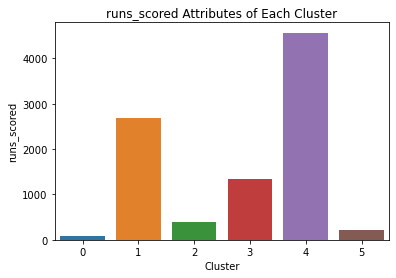

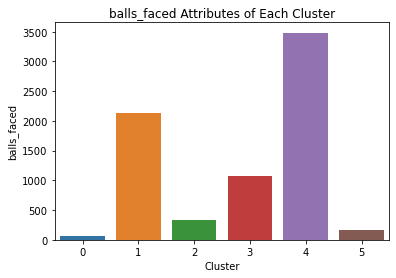

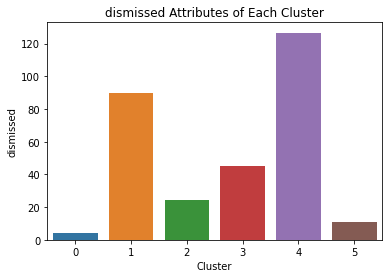

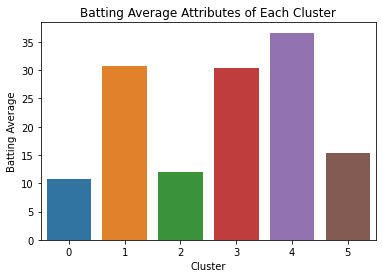

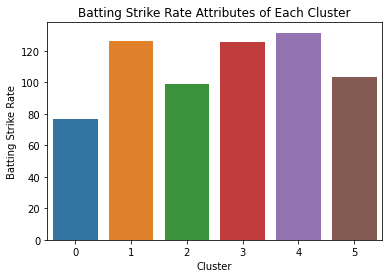

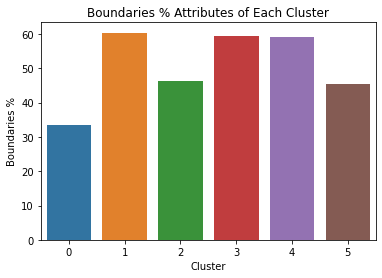

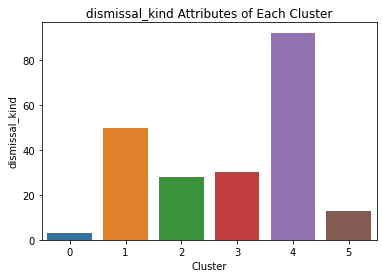

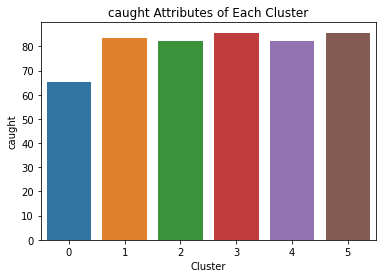

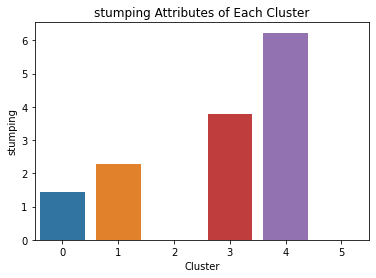

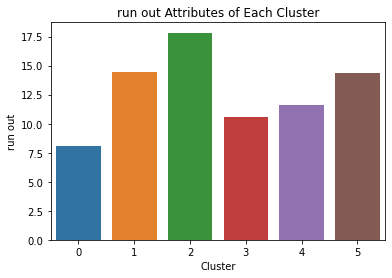

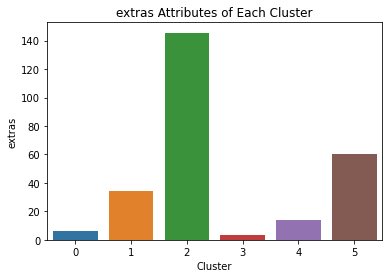

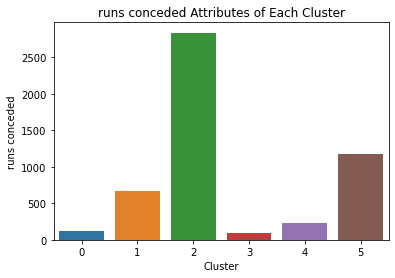

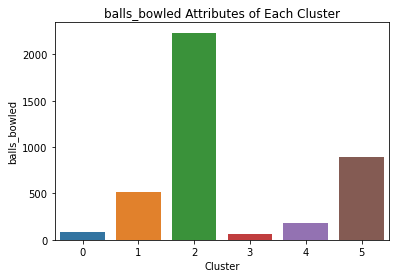

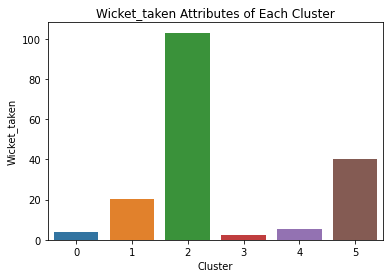

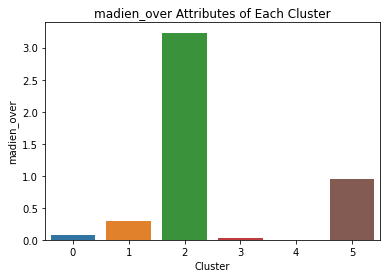

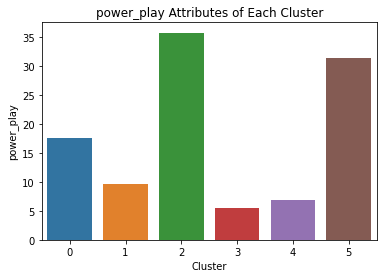

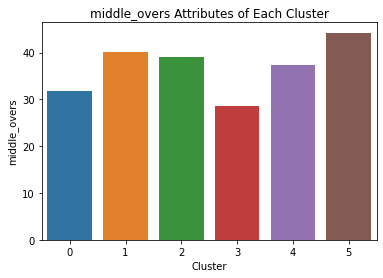

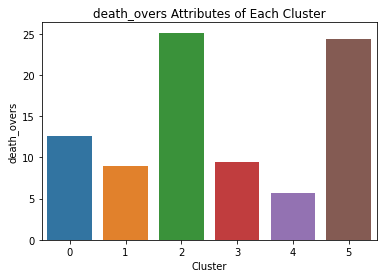

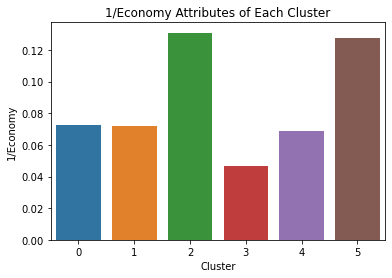

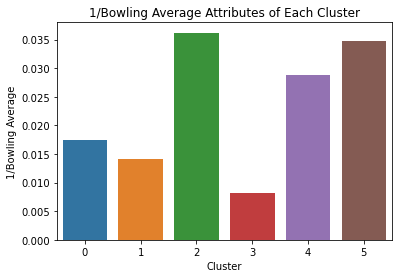

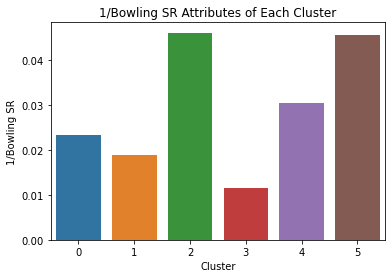

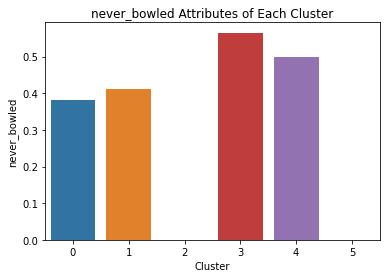

In [43]:
# Lets Investigate Each Cluster 
cluster_df=final_df.groupby(['Cluster']).mean().reset_index()
cols=list(cluster_df.columns[1:])
for col in cols:
    sns.barplot(cluster_df['Cluster'],cluster_df[col])
    plt.ylabel(col)
    plt.xlabel('Cluster')
    plt.title('{} Attributes of Each Cluster'.format(col))
    plt.show()

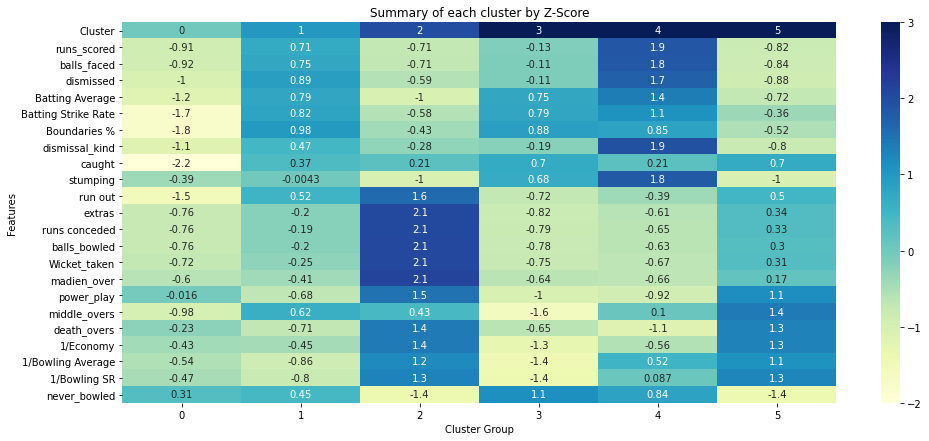

In [44]:
# Heatmap for each cluster
# First lets standardise each variable so we can easily compare the groups
# We will do this using the z-score 
from scipy import stats
cluster_df[cols]=cluster_df[cols].apply(stats.zscore)
cluster_df
f,ax=plt.subplots(figsize=(16,7))
rows=cluster_df.T
sns.heatmap(rows,annot=True,cmap="YlGnBu",vmin=-2,vmax=3)
plt.ylabel('Features')
plt.xlabel('Cluster Group')
plt.title('Summary of each cluster by Z-Score')
plt.show()

In [45]:
# Let's get a snapshot of each group's players 
for i in range(0,num_clusters):
    row=final_df['player'][final_df['Cluster']==i].reset_index()
    random_subset = row.sample(n=5,random_state=0)
    print('Example of Players in Cluster {}: {}'.format(i,list(random_subset['player'])))

Example of Players in Cluster 0: ['LA Pomersbach', 'S Tyagi', 'Misbah-ul-Haq', 'RR Rossouw (sub)', 'Avesh Khan']
Example of Players in Cluster 1: ['BB McCullum', 'M Vijay', 'PA Patel', 'R Dravid', 'SV Samson']
Example of Players in Cluster 2: ['AB Dinda', 'YS Chahal', 'JJ Bumrah', 'IK Pathan', 'SP Narine']
Example of Players in Cluster 3: ['M Vohra', 'KS Williamson', 'MK Tiwary', 'BJ Hodge', 'EJG Morgan']
Example of Players in Cluster 4: ['MS Dhoni', 'V Kohli', 'G Gambhir', 'SK Raina', 'CH Gayle']
Example of Players in Cluster 5: ['R Dhawan', 'M Kartik', 'M Muralitharan', 'SK Trivedi', 'TG Southee']


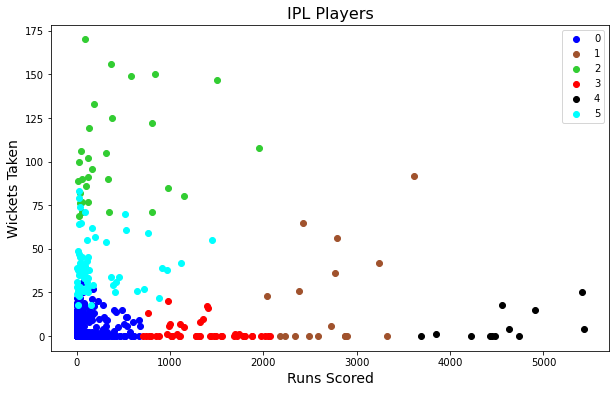

In [46]:
# Let's do a scatter comparison
f,ax=plt.subplots(figsize=(10,6))
colors = ["blue", "sienna", "limegreen", "red", "black",'cyan']
for r in range(0,num_clusters):
    clustered_players = final_df[final_df["Cluster"] == r]
    plt.scatter(clustered_players["runs_scored"], clustered_players["Wicket_taken"], color=colors[r],label=r)
plt.title("IPL Players", fontsize=16)
plt.xlabel("Runs Scored", fontsize=14)
plt.ylabel("Wickets Taken", fontsize=14)
plt.legend() 
plt.show()

## Summary of my interpretation of each group
* Group 0: Low-Performing Players

I would classify group 0 as the low performing group because as we can see from the scatter plot, it seems that players in the group have neither scored a lot of runs nor taken a lot of wickets. This is further reinforced by the heatmap, which shows that the players in this group have lower than the average for all performance metrics.This suggests that in fact these players are low performing rather than in-experienced since they have lower than the average Batting Averages, Batting Strike Rates, Bowling Averages, Bowling Strike Rates and Economy, which are metrics that are not reliant on the number of balls faced/bowled.  

* Group 1: Batting All Rounders/Hitters

My interpretation of group 1 is that it is filled up with the aggressive hitters or batting all rounders. This is primarily because we can see from the heatmap that this group averages the greatest boundary percentages. I also think that this group is filled with batting all rounders because we can see from the scatter plot that some players have taken more than 25 wickets throughout their IPL careers. Furthermore, we can also see that the overs bowled tend to be in the middle of the innings and less so at the end of the innings. I tend to notice this to be the case for batting allrounders.

* Group 2: 'Star'/Experienced Bowlers 

For Group 2, I think it can obviously be seen that these are relatively experienced 'star' bowlers. This can be infered through the high amount of wickets taken, balls bowled, and madien overs amongst other variables. They also tend to bowl more in the powerplay and death overs, in which the pressure is really on.  


* Group 3: Mediocre Batsmen/ Wicketkeepers

I believe group 3 represents mediocre batters that are quite inexperienced. This is because these batters tend to have faced below average balls, and have been dismissed below the average. Despite this, their batting strike rates and bating averages are quite good, which suggests that these are batters who are inexperienced or ordinary. 

* Group 4: Star Batsmen/Wicketkeepers

Now we move on to the Star Batsmen: Group 4. This group seems consist of the elite batters throughout IPL history with names such as Virat Kohli and MS Dhoni making up a formidable force of players. We can see that players in group 4 are the cream of the crop when it comes to batting performance metrics with outstanding total runs scored, batting averages and strike rates. What's more is that these players tend to contribute the most in the field with the highest total dimissals. 

* Group 5: Inexperienced Bowlers

Last but not the least, we have group 5. Group 5 seems to consist of up and coming bowlers that are inexperienced in the IPL. This can be observed by the inferior total wickets taken in comparsion to the star bowler group. Despite this, this group seems to almost be matching the star bowler group in terms of bowling average, bowling strike rate and economy.

# Cluster Analysis
Now that we have interpreted each of the groups, it's time to move on to some analysis using our clustered data. Namely I will be looking at two specific things:

1. Which group has the most POTMs? Has this changed season on season?
2. The breakdown of the top-4 teams and bottom-2 teams from the 2019 IPL by cluster group? Is there any difference in the types of players a successful team vs. an unsuccessful team has?

In [47]:
# Summary of player and cluster
player_db=final_df[['player','Cluster']]
cluster={0:'Low Performing',1:'Hitters',2:'Star Bowlers',3:'Mediocre Batters',
                     4:'Star Batters',5:'Inexperienced Bowlers'}
# Let's label each group with our interpretations rather than the group number so that we can easily perform cluster analysis
player_db['Cluster_Name']=None
for i,j in cluster.items():
    player_db['Cluster_Name'].loc[player_db['Cluster']==i]=j
player_db

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/op

,player,Cluster,Cluster_Name
0,A Ashish Reddy,0,Low Performing
1,A Chandila,0,Low Performing
2,A Chopra,0,Low Performing
3,A Choudhary,0,Low Performing
4,A Dananjaya,0,Low Performing
...,...,...,...
605,YV Takawale,0,Low Performing
606,Yashpal Singh,0,Low Performing
607,Younis Khan,0,Low Performing
608,Yuvraj Singh,1,Hitters


In [48]:
# Set up the POTM table
potm=match_df.player_of_match.value_counts()
potm_df=pd.DataFrame(potm).reset_index()
potm_df.rename(columns={'index':'player'},inplace=True)

Text(0.5, 1.0, 'Total POTMs for Each Cluster')

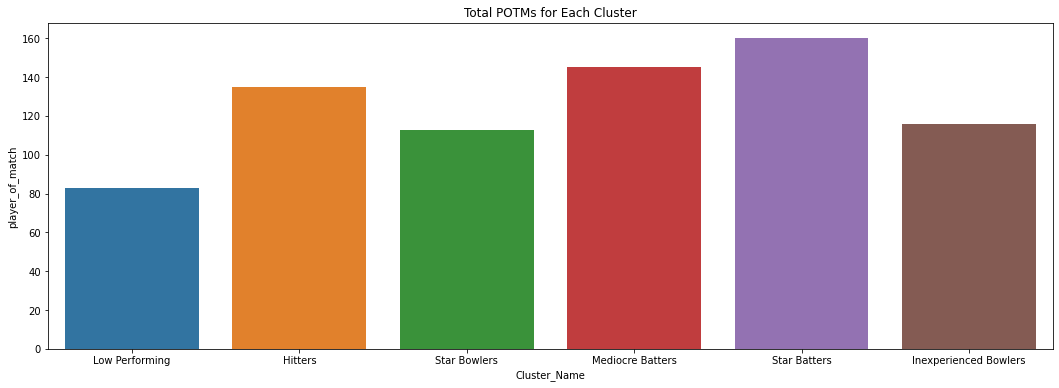

In [49]:
# Merge the two dfs
f,ax=plt.subplots(figsize=(18,6))
potm_by_cluster=potm_df.merge(player_db,how='inner',on='player')
potm_by_cluster=potm_by_cluster.groupby(['Cluster','Cluster_Name'])['player_of_match'].sum().reset_index()
sns.barplot(potm_by_cluster['Cluster_Name'],potm_by_cluster['player_of_match'])
plt.title('Total POTMs for Each Cluster')

In [50]:
# Look at the POTMs/Number of Players in that Cluster because cluster groups are not uniformly distributed
number=player_db['Cluster'].value_counts().reset_index().sort_values(by='index').reset_index()
number.drop(columns=['level_0'],inplace=True)
n=list(number['Cluster'].values)

Text(0.5, 1.0, 'Average Total POTM per person in each cluster')

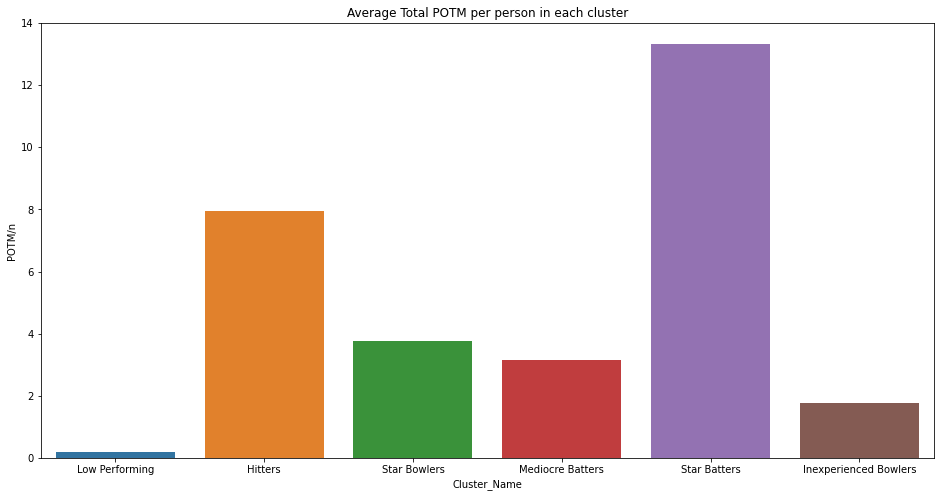

In [51]:
# Plot this
potm_by_cluster['n']=n
potm_by_cluster['POTM/n']=potm_by_cluster['player_of_match']/potm_by_cluster['n']
f,ax=plt.subplots(figsize=(16,8))
sns.barplot(potm_by_cluster['Cluster_Name'],potm_by_cluster['POTM/n'])
plt.title('Average Total POTM per person in each cluster')

In [52]:
# Let's look at how the number of POTM has varied over time
potm_time=match_df[['season','player_of_match']]
potm_time['count']=1
potm_time=potm_time.groupby(['season','player_of_match']).sum().reset_index()
potm_time.set_index('player_of_match',inplace=True)
potm_time_by_cluster=potm_time.merge(player_db,how='inner',left_on='player_of_match',right_on='player')
potm_time_by_cluster=potm_time_by_cluster.groupby(['Cluster','Cluster_Name','season'])['count'].sum().to_frame().reset_index()
potm_time_by_cluster.set_index('Cluster_Name',inplace=True)
potm_time_by_cluster

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cluster,season,count
Cluster_Name,,,
Low Performing,0,2008,16
Low Performing,0,2009,3
Low Performing,0,2010,8
Low Performing,0,2011,10
Low Performing,0,2012,8
...,...,...,...
Inexperienced Bowlers,5,2015,13
Inexperienced Bowlers,5,2016,9
Inexperienced Bowlers,5,2017,19


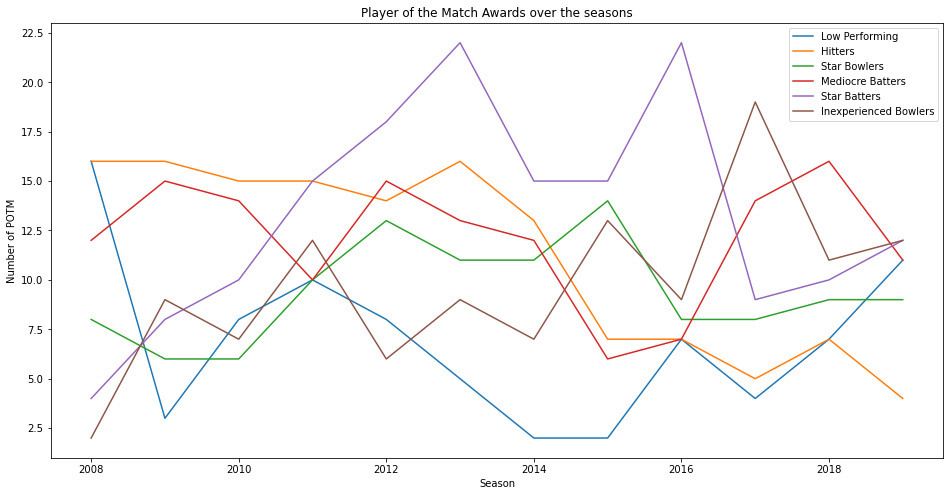

In [53]:
# Plot our findings
f,ax=plt.subplots(figsize=(16,8))
for i in potm_time_by_cluster.index.unique():
    plt.plot(potm_time_by_cluster['season'].loc[i],potm_time_by_cluster['count'].loc[i],label=i)
    plt.xlabel('Season')
    plt.ylabel('Number of POTM')
    
plt.title('Player of the Match Awards over the seasons')
plt.legend()
plt.show()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


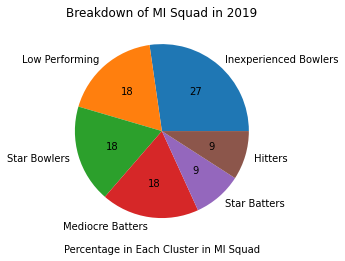

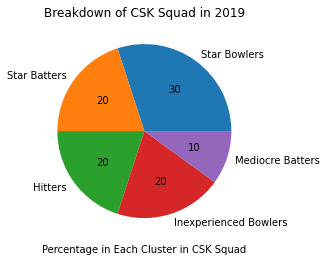

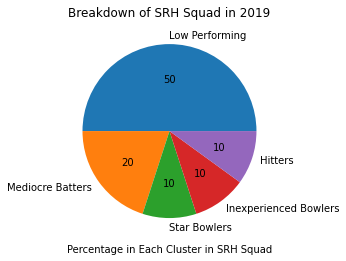

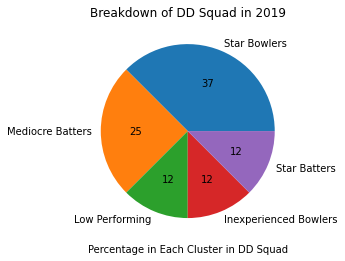

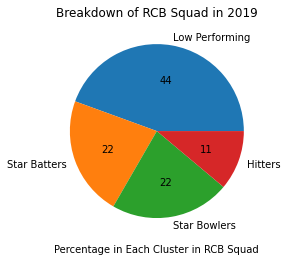

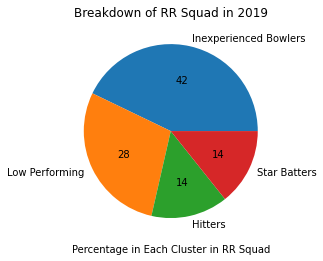

In [54]:
# Squad Breakdown
# Let's consider the top 4 teams and the bottom 2 teams from latest IPL (2019) and the breakdown of their squad they fielded in their final game:
MI=['Q de Kock','RG Sharma','SA Yadav','Ishan Kishan','KH Pandya','KA Pollard','HH Pandya','RD Chahar','MJ McClenaghan','JJ Bumrah','SL Malinga']
CSK=['F du Plessis','SR Watson','SK Raina','AT Rayudu','MS Dhoni','DJ Bravo','RA Jadeja','SN Thakur',' DL Chahar','Harbhajan Singh','Imran Tahir']
DD=['PP Shaw','S Dhawan','C Munro','SS Iyer','RR Pant','AR Patel','SE Rutherford','KMA Paul','A Mishra','TA Boult','I Sharma']
SRH=['WP Saha','MJ Guptill','MK Pandey','KS Williamson','V Shankar','Mohammad Nabi','DJ Hooda','Rashid Khan','B Kumar','Basil Thampi','KK Ahmed']
RCB=['PA Patel','V Kohli','AB de Villiers','SO Hetmyer','Gurkeerat Singh','C de Grandhomme','Washington Sundar','UT Yadav','K Khejroliya', 'YS Chahal', 'NA Saini']
RR=['AM Rahane','LS Livingstone','SV Samson','MK Lomror','S Gopal','R Parag','STR Binny','K Gowtham','IS Sodhi','VR Aaron']
for a,t in [['MI',MI],['CSK',CSK],['SRH',SRH],['DD',DD],['RCB',RCB],['RR',RR]]:
    db=player_db.loc[player_db['player'].isin(t)]
    db=db['Cluster_Name'].value_counts().to_frame()
    plt.pie(db,labels=db.index,autopct=int)
    plt.title('Breakdown of {} Squad in 2019'.format(a))
    plt.xlabel('Percentage in Each Cluster in {} Squad'.format(a))
    plt.show()

# References 

Check Out [My Blog Post](https://mirpurishail.wixsite.com/portfolio/data-blogs) on this Project to find out more about my interpretations of this data

[Cluster Feature Scatter Plot Inspiration (cell 102)](https://www.kaggle.com/ruchi798/ipl-player-clusters#F.-Example-of-a-well-rounded-Team)

[MatPlotLib Documentation](https://matplotlib.org/3.3.1/index.html)

[Pandas Documentation](https://pandas.pydata.org/docs/)

[Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

[Starting Line Ups Reference](https://www.espncricinfo.com)